# Derivation of the cauchy BC

We would like to derive the cauchy BC, which for a field $f$ reads

$$
f(0) = a\\
\partial_z f\big|_0 = b
$$

**WARNING**: This scheme is only first order convergent

In [1]:
from IPython.display import display
from sympy import init_printing
from sympy import symbols, as_finite_diff, solve, latex
from sympy import Function, Eq

fg, fBC, f0, f1, f2 = symbols('f_g, f_BC, f_0, f_1, f_2')
z, h = symbols('z, h')
a, b = symbols('a, b')
f = Function('f')

init_printing()

Extrapolation of $f(0) = a$ to the ghost point yields (see [ghost4thOrder](boundaryPolynomials/ghost4thOrder.ipynb) for calculation) yields

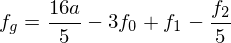

In [2]:
extraPolate = Eq(fg, 16*a/5 - 3*f0 + f1 - f2/5)
display(extraPolate)

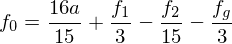

In [3]:
solvedForF0 = Eq(f0, solve(extraPolate, f0)[0])
display(solvedForF0)

Furthermore a second order FD of $\partial_z f\big|_0 = b$ reads

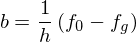

In [4]:
deriv = as_finite_diff(f(z).diff(z), [z-h/2, z+h/2])
deriv = Eq(b ,deriv.subs([(f(z-h/2), fg), (f(z+h/2), f0)]).together())
display(deriv)

Substituting $f_0$ gives

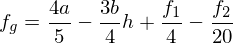

In [5]:
full = deriv.subs(f0, solvedForF0.rhs)
fullSolvedForFg = Eq(fg, solve(full, fg)[0])
display(fullSolvedForFg)

In [6]:
print(latex(fullSolvedForFg))

f_{g} = \frac{4 a}{5} - \frac{3 b}{4} h + \frac{f_{1}}{4} - \frac{f_{2}}{20}
